In [1]:
# Educational institutions increasingly rely on data to improve student outcomes, reduce failure rates, and allocate academic support effectively.
# However, student performance is not driven by grades alone.

# Factors such as:
    # -  Attendance consistency
    # - Study habits and daily routines
    # - Psychological aspects (motivation, exam anxiety)
    # - Lifestyle choices (sleep, screen time)
    # - Family and study environment

# all interact in complex ways to influence academic success.
# Despite having access to rich student-level data, schools often lack:
    # - Clear insights into which factors matter most
    # - Predictive tools to identify at-risk students early
    # - Data-driven guidance for targeted academic interventions

# This project addresses that gap by using data science techniques to analyze, explain, and predict student performance.

# Load the dataset directly from Kaggle using Kagglehub

In [3]:
# !pip install kagglehub
# Comment out if already installed
# This is useful for reproducibility. You can run this on your notebook easily.

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("algozee/student")

# You print the path to confirm where the dataset was downloaded.
# This is a sanity check and helps debug file path issues.
print("C:/Users/gianc/OneDrive/Desktop/pythonrepos/Dataset Kaggle/Predicting Student Success/archive", path)

C:/Users/gianc/OneDrive/Desktop/pythonrepos/Dataset Kaggle/Predicting Student Success/archive C:\Users\gianc\.cache\kagglehub\datasets\algozee\student\versions\1


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
# Best practice: after loading, quickly display the dataframe to confirm:
    # - data loaded correctly
    # - columns look as expected
    # - values are plausible
students_success = pd.read_csv("student_performance_interactions.csv")
students_success

,student_id,final_score,grade,pass_fail,previous_score,math_prev_score,science_prev_score,language_prev_score,daily_study_hours,attendance_percentage,homework_completion_rate,sleep_hours,screen_time_hours,physical_activity_minutes,motivation_score,exam_anxiety_score,parent_education_level,study_environment
0,S0001,60.137241,D,1,60.599707,61.488212,53.568119,64.972292,1.427203,75.738405,68.534371,6.809352,3.313096,65.059425,4.150025,6.104103,Master,Noisy
1,S0002,99.021977,A,1,92.289287,85.612565,91.873759,89.040461,4.813612,89.602736,91.990197,5.567793,4.925359,76.016617,8.714693,1.982358,High School,Quiet
2,S0003,70.522955,C,1,80.259667,82.160656,72.736065,74.243663,1.240908,81.495426,69.669666,6.702875,5.107888,113.616872,5.928220,4.463662,High School,Moderate
3,S0004,63.448537,D,1,72.926217,75.979145,76.726496,67.715995,2.190601,71.472047,71.976757,7.854439,3.772446,108.686690,4.224928,4.740474,High School,Noisy
4,S0005,66.483019,C,1,48.581025,51.379977,48.993224,46.145011,2.192265,64.276582,68.940591,7.662429,1.898989,42.107294,9.506815,1.143852,Master,Quiet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S0996,59.206313,D,1,45.037014,38.436901,43.612637,47.394726,4.638258,69.249006,96.251273,6.816746,4.582381,64.714504,9.342533,2.890583,Bachelor,Noisy
996,S0997,79.122551,C,1,90.452247,87.393401,89.171348,81.296522,2.078520,84.259602,67.662648,7.933475,2.932469,111.320337,5.620030,3.687013,Master,Quiet
997,S0998,50.601257,D,1,47.525025,47.339841,46.317537,41.382806,4.278708,71.120438,96.521984,7.501127,2.056315,51.508793,4.209895,6.816193,Master,Noisy
998,S0999,89.253071,B,1,92.263054,90.116543,91.954233,81.885114,4.997401,86.022243,100.131470,6.557973,4.163385,48.586185,5.566401,5.277389,High School,Noisy


In [6]:
# We can see above that the data set shape is 1000 rows x 18 columns. Columns includes student_id, target/label data final_score and pass_fail,
# and predictors such as prior scores, habits, lifestyle, motivation/anxiety, family/environment.

# Data Understanding and Quality Validation

In [8]:
# Create a working copy so you never mutate the raw loaded dataframe accidentally.
# This is a professional habit for reproducibility and auditability.
df = students_success.copy()
df.head(10)

,student_id,final_score,grade,pass_fail,previous_score,math_prev_score,science_prev_score,language_prev_score,daily_study_hours,attendance_percentage,homework_completion_rate,sleep_hours,screen_time_hours,physical_activity_minutes,motivation_score,exam_anxiety_score,parent_education_level,study_environment
0,S0001,60.137241,D,1,60.599707,61.488212,53.568119,64.972292,1.427203,75.738405,68.534371,6.809352,3.313096,65.059425,4.150025,6.104103,Master,Noisy
1,S0002,99.021977,A,1,92.289287,85.612565,91.873759,89.040461,4.813612,89.602736,91.990197,5.567793,4.925359,76.016617,8.714693,1.982358,High School,Quiet
2,S0003,70.522955,C,1,80.259667,82.160656,72.736065,74.243663,1.240908,81.495426,69.669666,6.702875,5.107888,113.616872,5.928220,4.463662,High School,Moderate
3,S0004,63.448537,D,1,72.926217,75.979145,76.726496,67.715995,2.190601,71.472047,71.976757,7.854439,3.772446,108.686690,4.224928,4.740474,High School,Noisy
4,S0005,66.483019,C,1,48.581025,51.379977,48.993224,46.145011,2.192265,64.276582,68.940591,7.662429,1.898989,42.107294,9.506815,1.143852,Master,Quiet
5,S0006,49.088061,F,0,48.579699,53.983602,41.291941,46.820092,2.281605,61.624397,71.320143,7.302930,3.338791,45.551069,4.837854,5.588057,Bachelor,Noisy
6,S0007,48.453234,F,0,43.194599,47.364209,41.648553,39.344618,1.657147,59.876980,70.616070,6.534114,5.840363,62.187649,7.310676,1.618658,Master,Quiet
7,S0008,84.613576,B,1,87.639688,89.935588,83.878906,81.159105,4.132646,81.947173,88.404181,6.769044,4.764931,56.166948,5.644325,3.571354,Bachelor,Quiet
8,S0009,66.451909,C,1,73.061326,72.710497,74.657198,70.780722,1.489991,71.631035,61.153126,6.949089,5.055813,85.329386,4.391157,6.297339,Master,Moderate
9,S0010,74.209510,C,1,78.943992,70.639187,85.646244,79.851125,3.539627,69.685303,84.288583,7.848449,1.164127,111.249844,4.299535,5.465958,Master,Quiet


In [9]:
# Confirm dataset dimensions
# This is a key validation step before EDA and modeling.
df.shape

# This exactly matches the dataset overview.

(1000, 18)

In [10]:
# Inspect schema:
    # - verifies numeric vs categorical columns
    # - ensures targets are in correct types (final_score numeric, pass_fail int)
    # - confirms there are no unexpected nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   student_id                 1000 non-null   object 
 1   final_score                1000 non-null   float64
 2   grade                      1000 non-null   object 
 3   pass_fail                  1000 non-null   int64  
 4   previous_score             1000 non-null   float64
 5   math_prev_score            1000 non-null   float64
 6   science_prev_score         1000 non-null   float64
 7   language_prev_score        1000 non-null   float64
 8   daily_study_hours          1000 non-null   float64
 9   attendance_percentage      1000 non-null   float64
 10  homework_completion_rate   1000 non-null   float64
 11  sleep_hours                1000 non-null   float64
 12  screen_time_hours          1000 non-null   float64
 13  physical_activity_minutes  1000 non-null   float6

In [11]:
# Our dataset types are clean, final score is float, pass_fail is int, categorical fields are object like grade, parent_education_level, and
# study_environment, no missing values appear in the info summary. This is exactly what we want to know before we proceed.

In [12]:
# Listing columns helps us confirm target variables exist, avoid typos later, and identify leakage features early like grade and pass_fail. Let's deal
# with those columns later.
df.columns.tolist()

['student_id',
 'final_score',
 'grade',
 'pass_fail',
 'previous_score',
 'math_prev_score',
 'science_prev_score',
 'language_prev_score',
 'daily_study_hours',
 'attendance_percentage',
 'homework_completion_rate',
 'sleep_hours',
 'screen_time_hours',
 'physical_activity_minutes',
 'motivation_score',
 'exam_anxiety_score',
 'parent_education_level',
 'study_environment']

In [13]:
# Check duplicates in student_id.
# This ensures each row represents a unique student.
df['student_id'].duplicated().sum()

# We have 0 duplicates meaning we are modeling true student-level records, not repeated entries that could bias distributions and metrics.

0

In [14]:
# Check missing values across all columns.
# Missing values can bias EDA and break models unless handled.
df.isna().sum()

# All zeros and no missing values. This is excellent because it reduces uncertainty.

student_id                   0
final_score                  0
grade                        0
pass_fail                    0
previous_score               0
math_prev_score              0
science_prev_score           0
language_prev_score          0
daily_study_hours            0
attendance_percentage        0
homework_completion_rate     0
sleep_hours                  0
screen_time_hours            0
physical_activity_minutes    0
motivation_score             0
exam_anxiety_score           0
parent_education_level       0
study_environment            0
dtype: int64

In [15]:
# High-level numeric summary includes distribution range, central tendency, and spread.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
final_score,1000.0,70.935159,14.376419,37.364699,60.079082,70.673531,81.830057,100.000000
pass_fail,1000.0,0.930000,0.255275,0.000000,1.000000,1.000000,1.000000,1.000000
previous_score,1000.0,66.964110,16.067555,40.254761,52.978530,67.324406,80.937577,94.984472
math_prev_score,1000.0,67.458590,16.593689,30.235250,53.098000,67.561105,81.380928,104.984169
science_prev_score,1000.0,67.033210,17.105514,25.752553,52.509398,66.133873,81.319085,107.432492
language_prev_score,1000.0,66.906063,16.705229,27.176600,53.562773,66.693546,80.269633,107.561521
daily_study_hours,1000.0,2.984155,1.158047,1.003774,1.985539,2.934717,3.971015,4.997401
attendance_percentage,1000.0,73.275703,9.533937,47.445725,66.256237,73.328172,80.230732,99.111497
homework_completion_rate,1000.0,79.755579,12.360754,51.604853,69.964528,79.393715,89.592788,110.485203
sleep_hours,1000.0,6.964696,0.684015,4.500750,6.518039,6.976139,7.413489,9.353503


In [16]:
# Here are the most relevant stats:
# the final_score has a mean ≈ 70.94, std ≈ 14.38, min ≈ 37.36, max = 100. These scores are reasonably spread, which helps model learn meaningful
# variance. Also, with attendance_percentage the mean ≈ 73.28%, std ≈ 9.53, attendance varies enough to potentially be a strong predictor. While with,
# daily_study_hours with a mean ≈ 2.98, range ≈ 1.00 to 5.00, study time is bounded and realistic suggesting the dataset is well-constructed. Another,
# is the exam_anxiety_score with a mean ≈ 3.17, max ≈ 8.54, anxiety has variability, which makes it testable as a meaningful factor.

# To have a more detailed understanding of the summary stats, let's visualize all numerical columns and categorical columns together.

# Exploratory Data Analysis (EDA)

In [18]:
# Since we have leakage feature like grade, and pass_fail, and our goal is to predict the final_score we can just remove the grade and pass_fail column
# since it is typically derived from final_score. Also, we can remove the pass_fail column since it is a target/label column if you will do
# classification.

# Defining numeric and categorical columns
num_col_names = [
    'final_score',  
    'previous_score', 
    'math_prev_score', 
    'science_prev_score', 
    'language_prev_score', 
    'daily_study_hours', 
    'attendance_percentage', 
    'homework_completion_rate', 
    'sleep_hours', 
    'screen_time_hours', 
    'physical_activity_minutes', 
    'motivation_score',
    'exam_anxiety_score',
]

cat_col_names = [
    'parent_education_level',
    'study_environment'
]

# Create the final lists used downstream
num_columns = df[num_col_names].columns.tolist()
cat_columns = df[cat_col_names].columns.tolist()

# print("Numeric Columns:", nu_columns)
# print("Categorical Columns:", cat_columns)

# Print vertically to make it readable
print("Numeric Columns:")
for i in num_columns:
     print("-", i)
    
print("Categorical Columns:")
for i in cat_columns:
     print("-", i)

Numeric Columns:
- final_score
- previous_score
- math_prev_score
- science_prev_score
- language_prev_score
- daily_study_hours
- attendance_percentage
- homework_completion_rate
- sleep_hours
- screen_time_hours
- physical_activity_minutes
- motivation_score
- exam_anxiety_score
Categorical Columns:
- parent_education_level
- study_environment


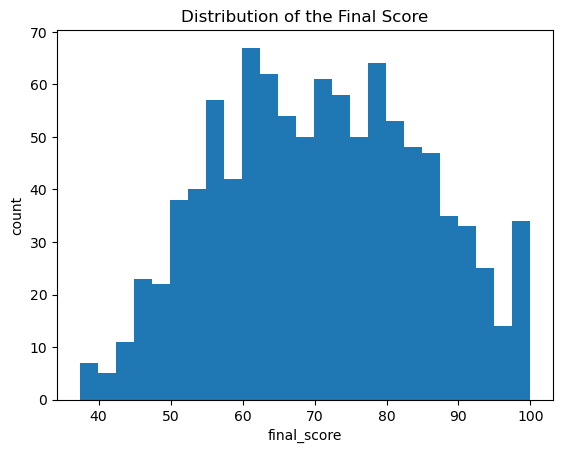

final_score skewness: 0.034


In [19]:
# Visualize target distribution to know whether regression is appropriate, and whether extreme skew suggests transformations.
plt.hist(df['final_score'], bins=25)
plt.title("Distribution of the Final Score")
plt.xlabel("final_score")
plt.ylabel("count")
plt.show()

# Skewness close to 0 indicates a roughly symmetric distribution
print("final_score skewness:", df['final_score'].skew().round(3))

In [20]:
# Since our target/label data is roughly bell-shaped, we can consider using regression which is usually easier. If in case our target/label data is
# heavily skewed, consider transformations like log, box-cox or robust models, but in this case, the skewness is 0.034, which, as it is closer to zero
# it indicates perfectly symmetric. This is ideal for regression. Less risk of models being dominated by outliers and standard metrics like MAE, RMSE,
# R^2 behave well.

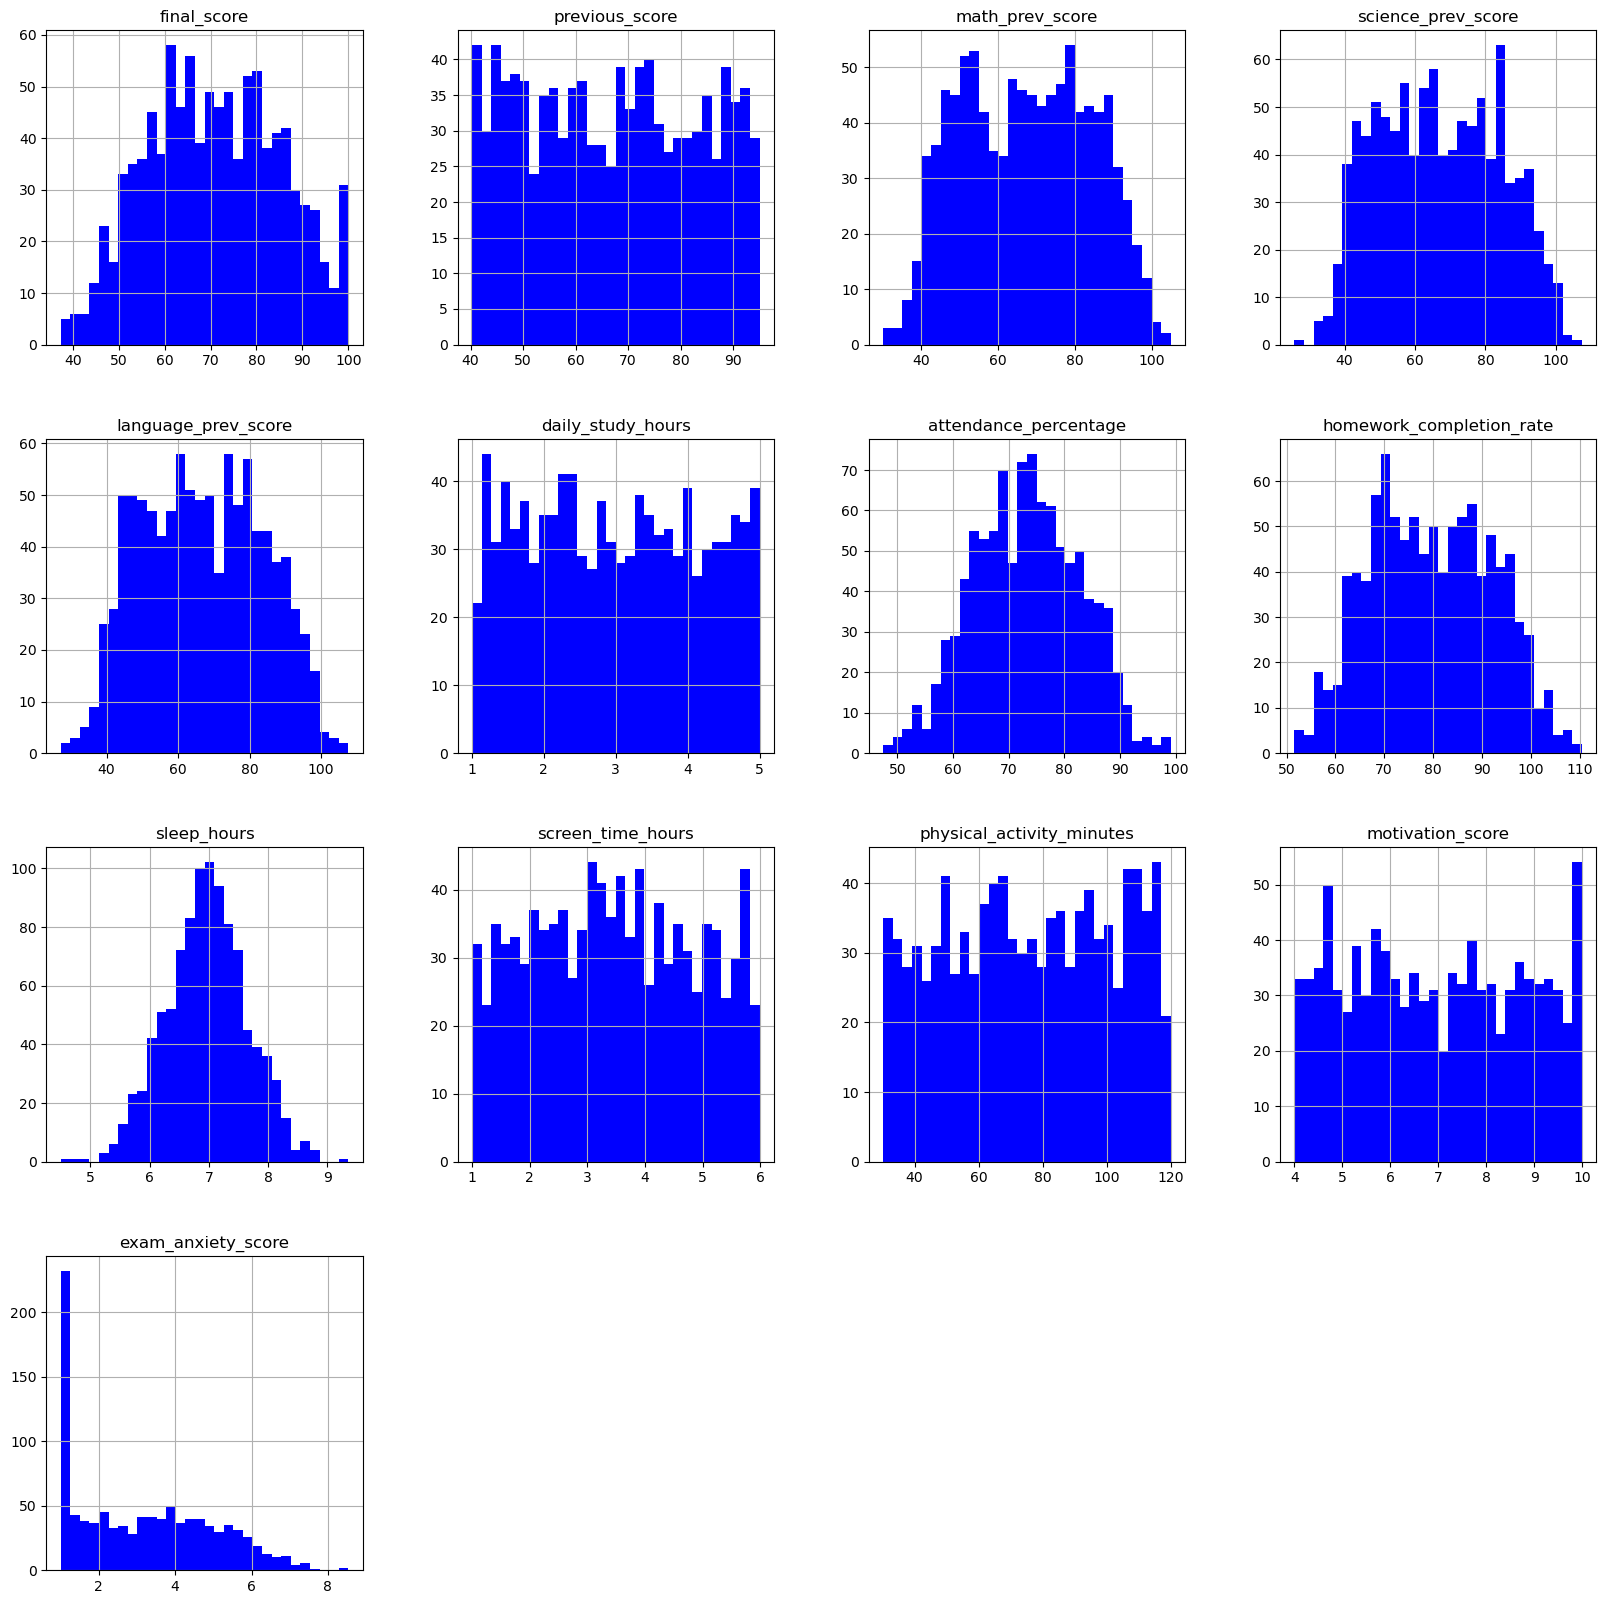

In [21]:
# Quick scan of numeric distributions to detect skewness, clipping or hard cutoffs, or detect unrealistic values
df[num_columns].hist(bins = 30, figsize = (20, 20), color = 'b');
plt.show()

In [22]:
# To better understand the structure and quality of the data, I examined the distributions of all numeric variables using histograms. This step helped
# me identify skewness, hard cutoffs, and any unrealistic values that could affect interpretation or modeling. Overall, the distributions appear
# well-behaved and fall within realistic ranges, indicating that the dataset is clean and suitable for regression analysis.

In [23]:
# Frequency counts help evaluate class balance and representation.
# This matters for fairness and also modeling strategy later.
for columns in cat_columns:
    print("--", columns, "--")
    print(df[columns].value_counts())

-- parent_education_level --
parent_education_level
Master         351
High School    331
Bachelor       318
Name: count, dtype: int64
-- study_environment --
study_environment
Quiet       337
Moderate    336
Noisy       327
Name: count, dtype: int64


In [24]:
# We can see that our categorical columns are well balanced, having Master - 351, High School - 331, Bachelor - 318 for parent_education_level, and
# Quiet - 337, Moderate - 336, Noisy - 327 for study_environment. Both are great for comparing group effects.

<Axes: xlabel='study_environment', ylabel='count'>

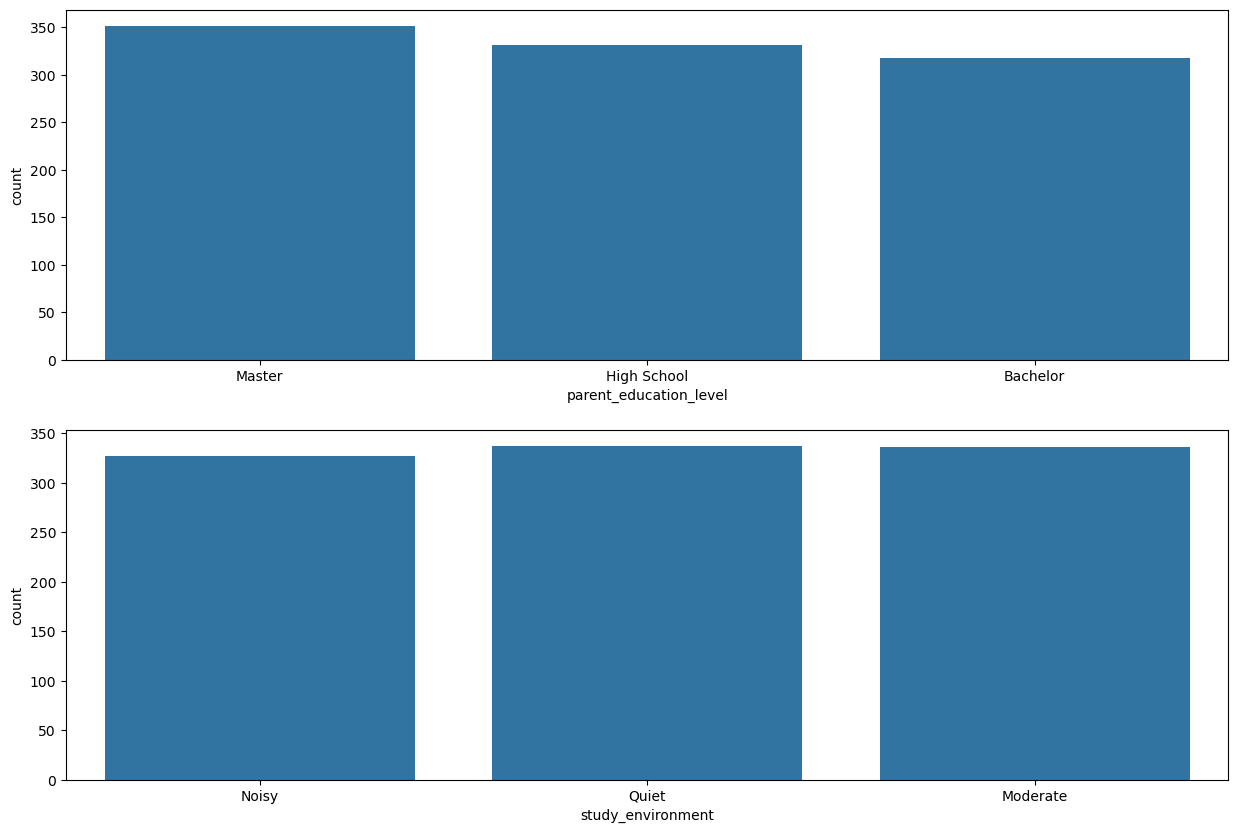

In [25]:
plt.figure(figsize = (15,10))

# 2 rows, 1 column
plt.subplot(211) # meaning 2 rows, 1 column, 1st figure
sns.countplot(x = 'parent_education_level', data = df[cat_columns])

plt.subplot(212) # meaning 2 rows, 1 column, 2nd figure
sns.countplot(x = 'study_environment', data = df[cat_columns])

In [26]:
# This vizz conforms that categories arent dominated by one group.

# Relationship and Driver Analysis

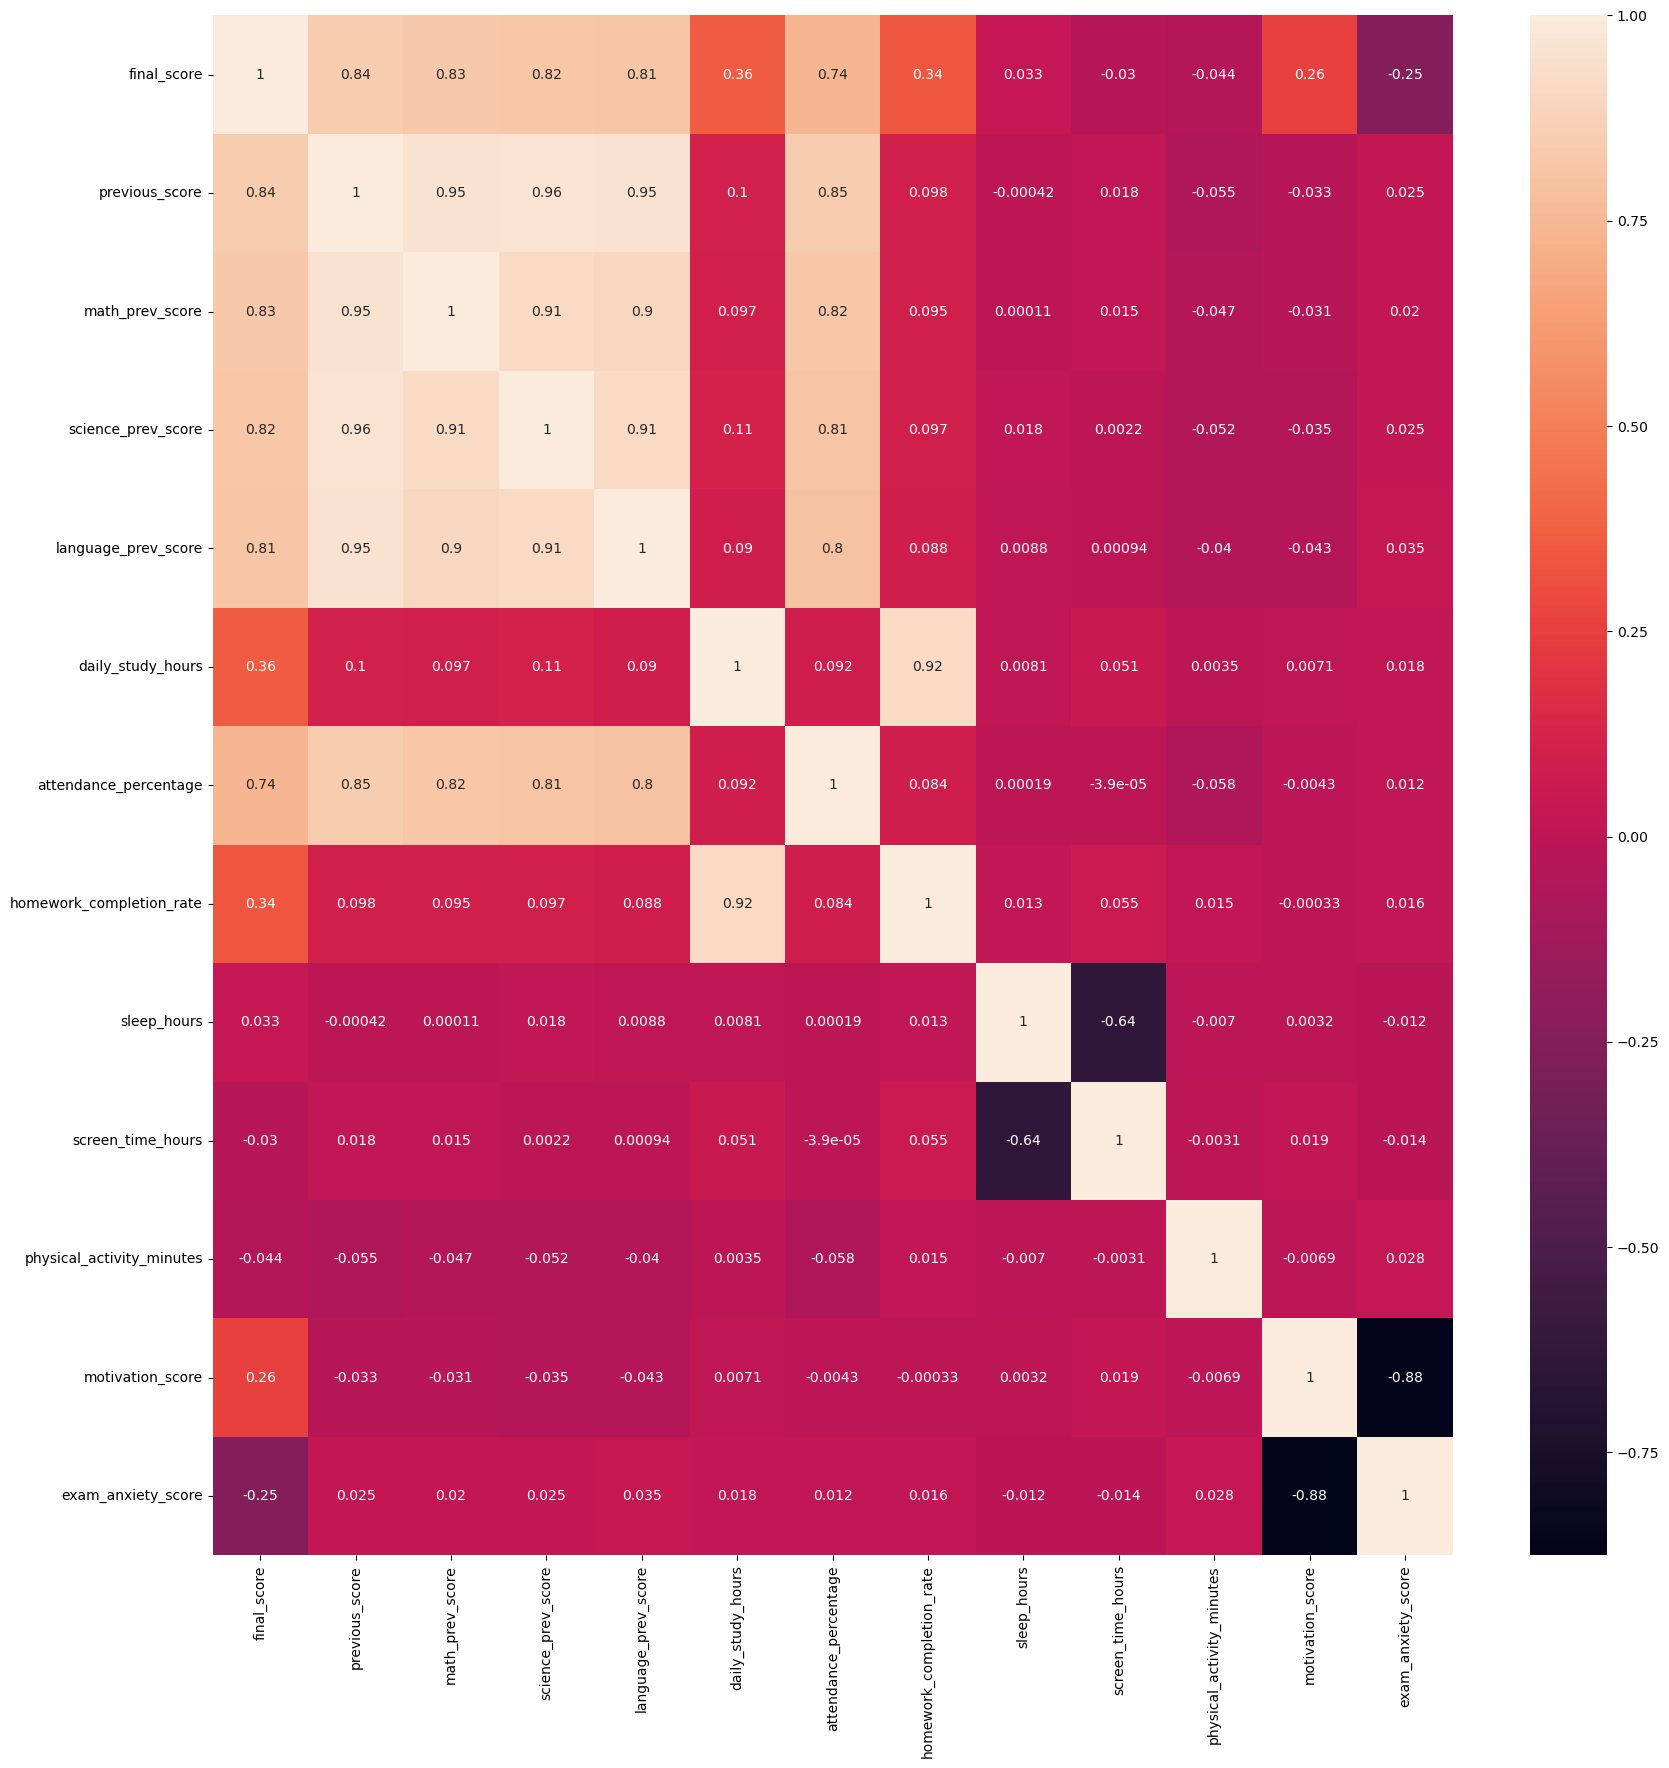

In [28]:
# Correlation matrix for numeric variables.
# This identifies linear relationships and potential multicollinearity.
plt.figure(figsize = (20,20))
corr_matrix = df[num_columns].corr()

# Heatmap, annotated=True is great for reporting and interpretation
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [29]:
# We can see that there are features that are very strong drivers for final_score, like previous_score with 0.84, math_prev_score with 0.83,
# science_prev_score with 0.82, language_prev_score with 0.81. Meaning student performance is strongly path dependent, prior mastery predicts later
# mastery. Also, attendance_percentage with 0.74, meaning, attendance is one of the highest-leverage levers school can influence operationally. Another,
# are columns like daily_study_hours with 0.36, and homework_completion_rate with 0.34, which means, study efforts matters, but id does not dominate
# prior achievement and attendance. Also, we have exam_anxiety_Score with -0.25. Lastly, sleep_hours with 0.033, scree_time_hours with -0.030 and
# physical_activity_minutes with -0.044. This does not mean that anxiety, sleep, screen_time, physical_activity dont matter in reality, it means that
# their linear relationship to final_score is weak. It could be due to limited variability in sleep, or maybe the effects are non-linear, or maybe some
# predictors dominate the signal, so it looks like other predictors are small.

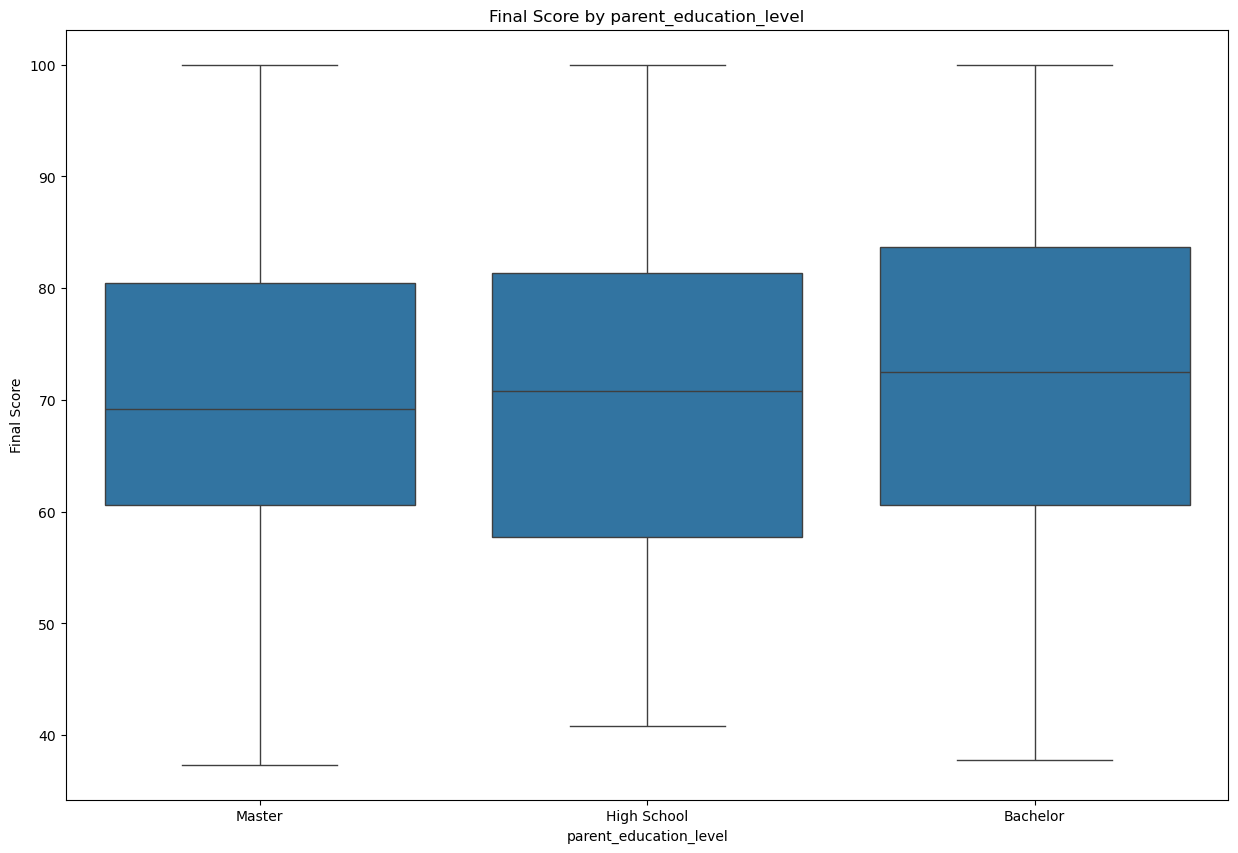

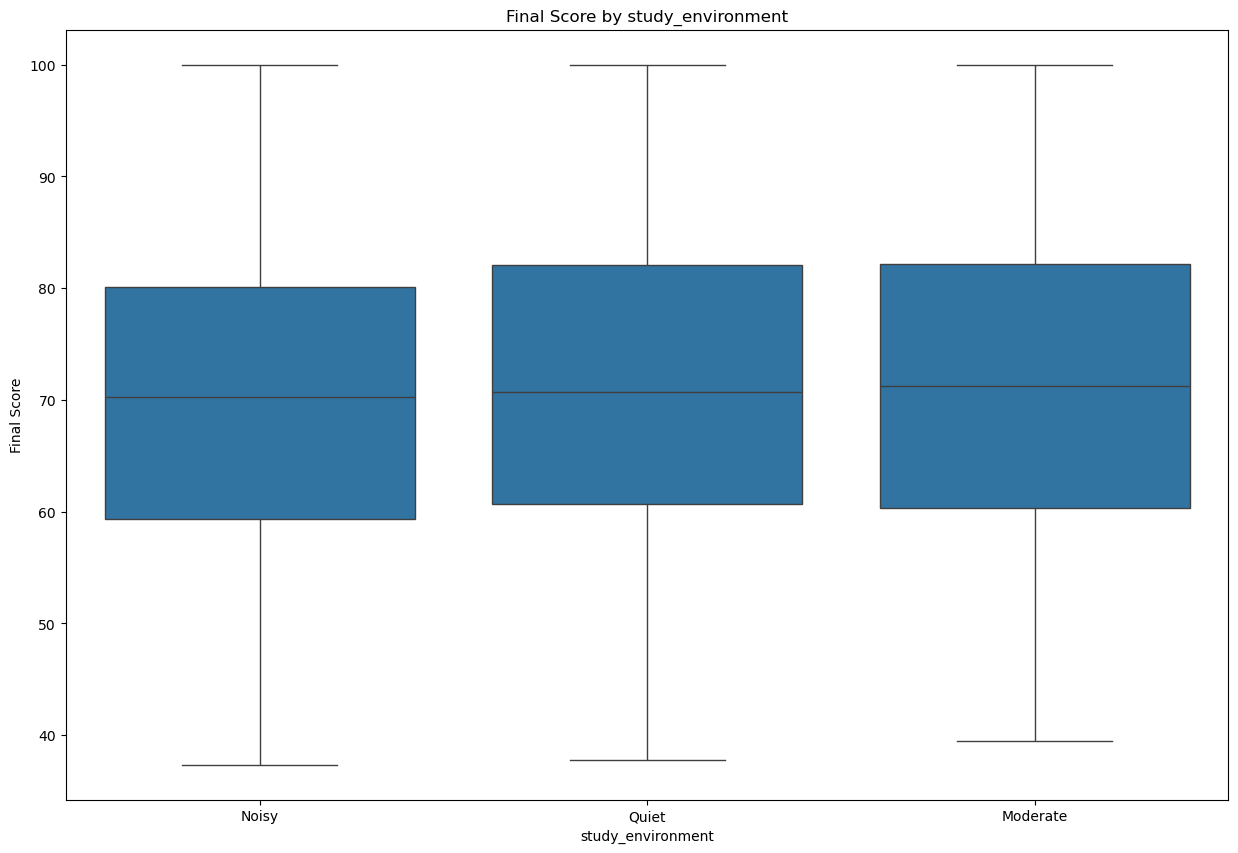

In [30]:
# Boxplots help compare score distributions across categories
# This highlights group-level differences rather than individual trends
for i in cat_columns:
    plt.figure(figsize=(15, 10))
    sns.boxplot(x = i, y = df['final_score'], data = df)
    plt.title(f"Final Score by {i}")
    plt.xlabel(i)
    plt.ylabel("Final Score")
    plt.show()

In [31]:
# The boxplots show that parent education level and study environment are related to final scores, but the differences are not very large. Parent
# education shows only small changes in scores, while students with quieter study environments tend to perform slightly better. Because the scores
# overlap a lot, these factors alone do not determine performance, but they may still help when analyzed together with other variables.

# Train models

In [33]:
model_df = pd.concat([df[num_columns], df[cat_columns]], axis = 1)
model_df

,final_score,previous_score,math_prev_score,science_prev_score,language_prev_score,daily_study_hours,attendance_percentage,homework_completion_rate,sleep_hours,screen_time_hours,physical_activity_minutes,motivation_score,exam_anxiety_score,parent_education_level,study_environment
0,60.137241,60.599707,61.488212,53.568119,64.972292,1.427203,75.738405,68.534371,6.809352,3.313096,65.059425,4.150025,6.104103,Master,Noisy
1,99.021977,92.289287,85.612565,91.873759,89.040461,4.813612,89.602736,91.990197,5.567793,4.925359,76.016617,8.714693,1.982358,High School,Quiet
2,70.522955,80.259667,82.160656,72.736065,74.243663,1.240908,81.495426,69.669666,6.702875,5.107888,113.616872,5.928220,4.463662,High School,Moderate
3,63.448537,72.926217,75.979145,76.726496,67.715995,2.190601,71.472047,71.976757,7.854439,3.772446,108.686690,4.224928,4.740474,High School,Noisy
4,66.483019,48.581025,51.379977,48.993224,46.145011,2.192265,64.276582,68.940591,7.662429,1.898989,42.107294,9.506815,1.143852,Master,Quiet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,59.206313,45.037014,38.436901,43.612637,47.394726,4.638258,69.249006,96.251273,6.816746,4.582381,64.714504,9.342533,2.890583,Bachelor,Noisy
996,79.122551,90.452247,87.393401,89.171348,81.296522,2.078520,84.259602,67.662648,7.933475,2.932469,111.320337,5.620030,3.687013,Master,Quiet
997,50.601257,47.525025,47.339841,46.317537,41.382806,4.278708,71.120438,96.521984,7.501127,2.056315,51.508793,4.209895,6.816193,Master,Noisy
998,89.253071,92.263054,90.116543,91.954233,81.885114,4.997401,86.022243,100.131470,6.557973,4.163385,48.586185,5.566401,5.277389,High School,Noisy


In [34]:
level = pd.get_dummies(model_df['parent_education_level'], drop_first = True, dtype = int)
level

,High School,Master
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
995,0,0
996,0,1
997,0,1
998,1,0


In [35]:
env = pd.get_dummies(model_df['study_environment'], drop_first = True, dtype = int)
env

,Noisy,Quiet
0,1,0
1,0,1
2,0,0
3,1,0
4,0,1
...,...,...
995,1,0
996,0,1
997,1,0
998,1,0


In [36]:
# Exclude derived variables to avoid leakage
model_df.drop(['study_environment', 'parent_education_level'], axis = 1, inplace = True)

In [37]:
clean_df = pd.concat([model_df, level, env], axis = 1)
clean_df

,final_score,previous_score,math_prev_score,science_prev_score,language_prev_score,daily_study_hours,attendance_percentage,homework_completion_rate,sleep_hours,screen_time_hours,physical_activity_minutes,motivation_score,exam_anxiety_score,High School,Master,Noisy,Quiet
0,60.137241,60.599707,61.488212,53.568119,64.972292,1.427203,75.738405,68.534371,6.809352,3.313096,65.059425,4.150025,6.104103,0,1,1,0
1,99.021977,92.289287,85.612565,91.873759,89.040461,4.813612,89.602736,91.990197,5.567793,4.925359,76.016617,8.714693,1.982358,1,0,0,1
2,70.522955,80.259667,82.160656,72.736065,74.243663,1.240908,81.495426,69.669666,6.702875,5.107888,113.616872,5.928220,4.463662,1,0,0,0
3,63.448537,72.926217,75.979145,76.726496,67.715995,2.190601,71.472047,71.976757,7.854439,3.772446,108.686690,4.224928,4.740474,1,0,1,0
4,66.483019,48.581025,51.379977,48.993224,46.145011,2.192265,64.276582,68.940591,7.662429,1.898989,42.107294,9.506815,1.143852,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,59.206313,45.037014,38.436901,43.612637,47.394726,4.638258,69.249006,96.251273,6.816746,4.582381,64.714504,9.342533,2.890583,0,0,1,0
996,79.122551,90.452247,87.393401,89.171348,81.296522,2.078520,84.259602,67.662648,7.933475,2.932469,111.320337,5.620030,3.687013,0,1,0,1
997,50.601257,47.525025,47.339841,46.317537,41.382806,4.278708,71.120438,96.521984,7.501127,2.056315,51.508793,4.209895,6.816193,0,1,1,0
998,89.253071,92.263054,90.116543,91.954233,81.885114,4.997401,86.022243,100.131470,6.557973,4.163385,48.586185,5.566401,5.277389,1,0,1,0


In [38]:
# Define predictors and target
X = clean_df.drop('final_score', axis = 1)
y = clean_df['final_score']

In [39]:
X

,previous_score,math_prev_score,science_prev_score,language_prev_score,daily_study_hours,attendance_percentage,homework_completion_rate,sleep_hours,screen_time_hours,physical_activity_minutes,motivation_score,exam_anxiety_score,High School,Master,Noisy,Quiet
0,60.599707,61.488212,53.568119,64.972292,1.427203,75.738405,68.534371,6.809352,3.313096,65.059425,4.150025,6.104103,0,1,1,0
1,92.289287,85.612565,91.873759,89.040461,4.813612,89.602736,91.990197,5.567793,4.925359,76.016617,8.714693,1.982358,1,0,0,1
2,80.259667,82.160656,72.736065,74.243663,1.240908,81.495426,69.669666,6.702875,5.107888,113.616872,5.928220,4.463662,1,0,0,0
3,72.926217,75.979145,76.726496,67.715995,2.190601,71.472047,71.976757,7.854439,3.772446,108.686690,4.224928,4.740474,1,0,1,0
4,48.581025,51.379977,48.993224,46.145011,2.192265,64.276582,68.940591,7.662429,1.898989,42.107294,9.506815,1.143852,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,45.037014,38.436901,43.612637,47.394726,4.638258,69.249006,96.251273,6.816746,4.582381,64.714504,9.342533,2.890583,0,0,1,0
996,90.452247,87.393401,89.171348,81.296522,2.078520,84.259602,67.662648,7.933475,2.932469,111.320337,5.620030,3.687013,0,1,0,1
997,47.525025,47.339841,46.317537,41.382806,4.278708,71.120438,96.521984,7.501127,2.056315,51.508793,4.209895,6.816193,0,1,1,0
998,92.263054,90.116543,91.954233,81.885114,4.997401,86.022243,100.131470,6.557973,4.163385,48.586185,5.566401,5.277389,1,0,1,0


In [40]:
y

0      60.137241
1      99.021977
2      70.522955
3      63.448537
4      66.483019
         ...    
995    59.206313
996    79.122551
997    50.601257
998    89.253071
999    64.350338
Name: final_score, Length: 1000, dtype: float64

In [41]:
# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
X_train

,previous_score,math_prev_score,science_prev_score,language_prev_score,daily_study_hours,attendance_percentage,homework_completion_rate,sleep_hours,screen_time_hours,physical_activity_minutes,motivation_score,exam_anxiety_score,High School,Master,Noisy,Quiet
29,42.554773,38.081736,47.029964,39.807071,1.796879,52.563526,68.759234,6.802224,4.949323,115.060576,8.363755,1.880136,1,0,1,0
535,91.962115,85.402934,94.070048,94.044345,3.314167,87.134112,85.650098,7.554274,1.021798,106.884092,5.509987,3.716233,1,0,1,0
695,73.584102,76.825505,77.191915,67.161181,4.949474,80.658251,95.599642,6.912927,5.166372,36.113358,8.317984,1.000000,0,0,1,0
557,41.583047,40.070699,41.831916,40.838201,2.030528,61.843359,69.957113,6.747630,1.700224,94.620559,9.276504,1.000000,0,1,0,1
836,90.316525,91.810289,86.645656,85.387506,2.752176,83.329877,80.193588,6.750267,2.369574,45.685081,9.261151,1.000000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,62.571061,65.490702,58.523043,59.939821,1.588653,68.079959,68.287833,8.389814,1.898296,91.089839,4.726488,5.413334,0,0,0,1
270,84.514864,81.387050,88.640355,77.656495,4.731471,72.734058,94.972227,6.518329,4.201255,76.228740,8.309428,2.965225,1,0,0,0
860,82.654019,82.775116,91.700551,80.169359,3.966737,77.255019,94.486900,5.659864,4.392737,93.266910,8.089087,1.451171,0,0,0,0
435,78.553302,84.792013,79.882693,87.462297,1.229567,76.121997,60.028603,7.944421,3.057055,45.015441,4.959645,5.619431,1,0,0,0


In [43]:
X_test

,previous_score,math_prev_score,science_prev_score,language_prev_score,daily_study_hours,attendance_percentage,homework_completion_rate,sleep_hours,screen_time_hours,physical_activity_minutes,motivation_score,exam_anxiety_score,High School,Master,Noisy,Quiet
521,60.948997,65.909209,55.958694,56.259369,3.460279,62.735491,87.127896,6.260634,4.110147,44.600661,6.086030,2.740339,0,1,0,0
737,84.912969,88.067028,73.816467,87.034939,1.325789,88.094916,66.025736,6.796222,4.703899,30.393658,9.129554,1.742170,0,1,0,1
740,65.447388,71.552557,66.323445,67.961112,3.181712,68.671051,81.171947,5.737648,4.613059,101.933937,7.222724,3.461990,1,0,0,0
660,59.585320,62.899726,68.333239,60.312926,2.158912,62.662569,69.444880,8.243792,1.539623,42.489830,5.978273,4.203508,0,1,0,1
411,92.253408,85.583281,94.564272,95.815019,4.931788,89.242141,99.896998,8.851887,1.505141,80.981995,4.362682,6.283116,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,89.796009,92.546269,87.649787,94.260778,2.548893,87.132913,68.128740,7.282620,1.747747,111.618555,9.129502,1.115790,0,0,1,0
332,40.791642,45.141981,40.996238,39.287343,1.224897,60.583530,65.603528,5.898364,5.735853,35.232041,6.004463,3.901928,1,0,1,0
208,40.278387,39.173566,37.070979,34.627368,4.262982,61.679243,81.028237,7.090045,5.015228,115.917376,6.618107,3.665024,1,0,1,0
613,44.496747,45.179423,41.246627,44.118419,1.990527,66.631944,69.983755,6.043472,5.120472,114.849480,4.494118,6.162289,1,0,1,0


In [44]:
y_train

29     55.652147
535    92.956909
695    82.223680
557    59.913679
836    93.373129
         ...    
106    57.146255
270    95.674917
860    87.666370
435    73.943128
102    56.336432
Name: final_score, Length: 800, dtype: float64

In [45]:
y_test

521    66.680454
737    88.044168
740    69.285740
660    61.758567
411    87.647919
         ...    
408    96.087536
332    47.603770
208    42.668157
613    42.676663
78     81.312916
Name: final_score, Length: 200, dtype: float64

# Predictive Modeling (Regression)

In [47]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [48]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Random Forest": RandomForestRegressor(
        n_estimators=100,
        random_state=42
    )
}

# Model Evaluation

In [50]:
results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        "Model": model_name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R²": r2
    })

In [51]:
results_df = pd.DataFrame(results)
results_df.sort_values(by="RMSE")

,Model,MAE,MSE,RMSE,R²
2,Lasso Regression,3.580582,20.468964,4.524264,0.898199
1,Ridge Regression,3.584008,20.497616,4.527429,0.898057
0,Linear Regression,3.584230,20.501649,4.527875,0.898037
3,Random Forest,3.799487,24.023154,4.901342,0.880523


In [52]:
# Model performance metrics indicate stable generalization, with minimal differences across Linear, Ridge, and Lasso regression models. This suggests
# that the relationships between student features and final_scores are largely linear and well-behaved, with limited noise or overfitting.
# Regularization provides only marginal performance gains, reinforcing the robustness of the baseline linear model. In contrast, the Random Forest model
# performs slightly worse, indicating that additional model complexity does not improve predictive accuracy for this dataset.